In [1]:
using CairoMakie
using NAJ

In [278]:
U= lagrange_polynomial([1.0, 2, 3, 4], [6, 1.0, 3.0, 1.0])
x = 1:0.01:4.4
function phase_curve(E::Real, U, xi, vfactor=1.0, xl=10.0, N=300)
    X, V, DE = Float64[], Float64[], Float64[]
    @assert E-U(xi) ≥ 0.0
    x=xi
    append!(X, x)
    append!(V, vfactor * sqrt(2 * (E - U(x))))
    append!(DE, E-U(x))
    sign = 1.0
    for ii in 1:N
        x += V[end] *0.03
        if x>xl
            break
        end
        if E-U(x) < 0
            x = X[end]
            sign *= -1.0
        end 
        append!(X, x)
        append!(DE, E-U(x))
        append!(V, sign*vfactor * sqrt(2 * (E - U(x))))
    end
    return X, V, DE
end


phase_curve (generic function with 8 methods)

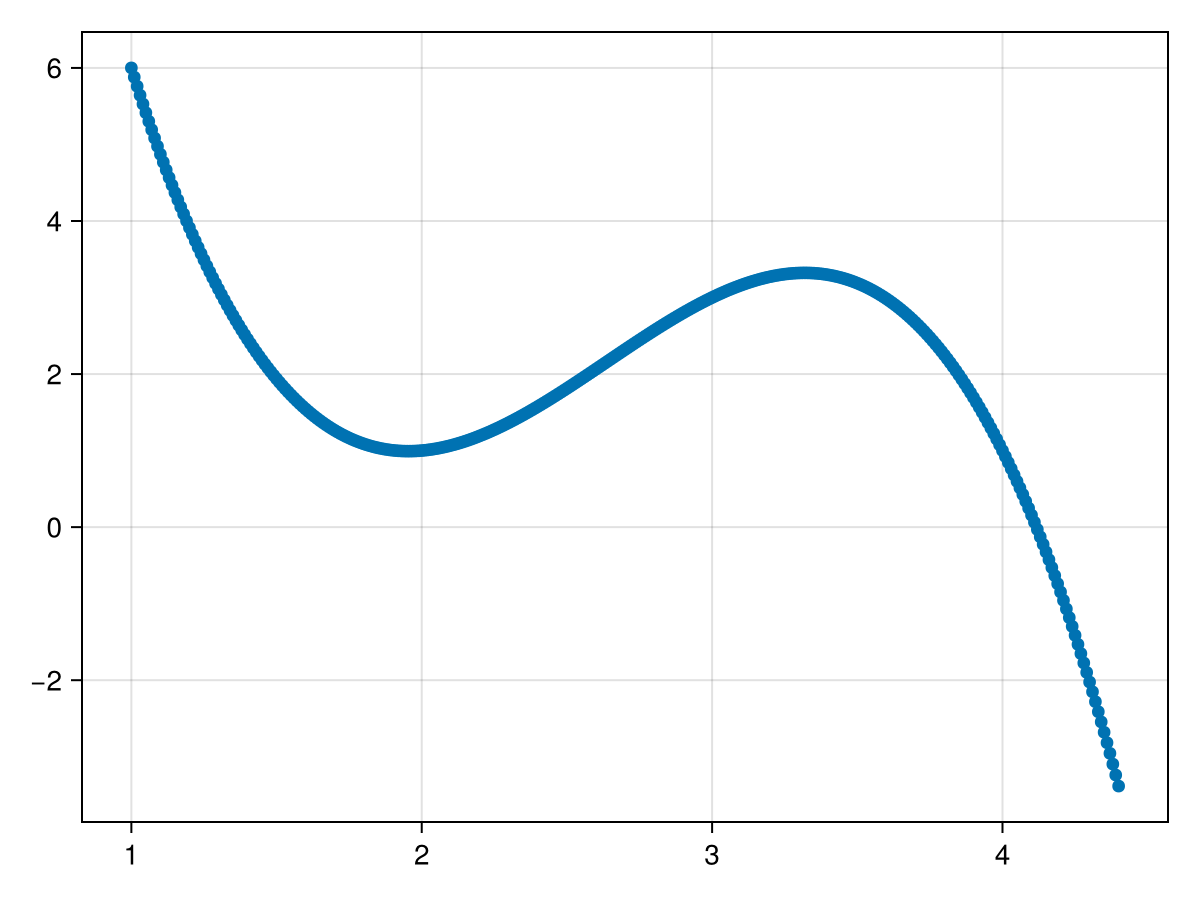

In [274]:
plot(x, U.(x))

([4.0, 3.9353501740141557, 3.8775317919282353, 3.825705578380146, 3.7791548053645845, 3.737264216055918, 3.6995031064715955, 3.6654116475083907, 3.634589752304395, 3.6066879577908737  …  3.470268860999639, 3.4831943031884043, 3.4972606928067953, 3.5125761265985602, 3.5292601780912394, 3.5474453317804473, 3.5672786321098733, 3.588923585306506, 3.6125623598981034, 3.6383983412993355], [-2.15499419952815, -1.927279402864008, -1.7275404516029669, -1.551692433852055, -1.3963529769555392, -1.2587036528107514, -1.1363819654401612, -1.0273965067998574, -0.930059817117365, -0.8429348849537077  …  0.4308480729588351, 0.4688796539463628, 0.5105144597254972, 0.5561350497559782, 0.6061717896402687, 0.6611100109808669, 0.7214984398877492, 0.7879591530532466, 0.861199380041067, 0.9420255455896753], [2.321999999999986, 1.8572029483519232, 1.4921980059622912, 1.2038747046368572, 0.9749008181262981, 0.7921674427995642, 0.6456819856888218, 0.5277717910922748, 0.43250563170819323, 0.35526961013596026  …  

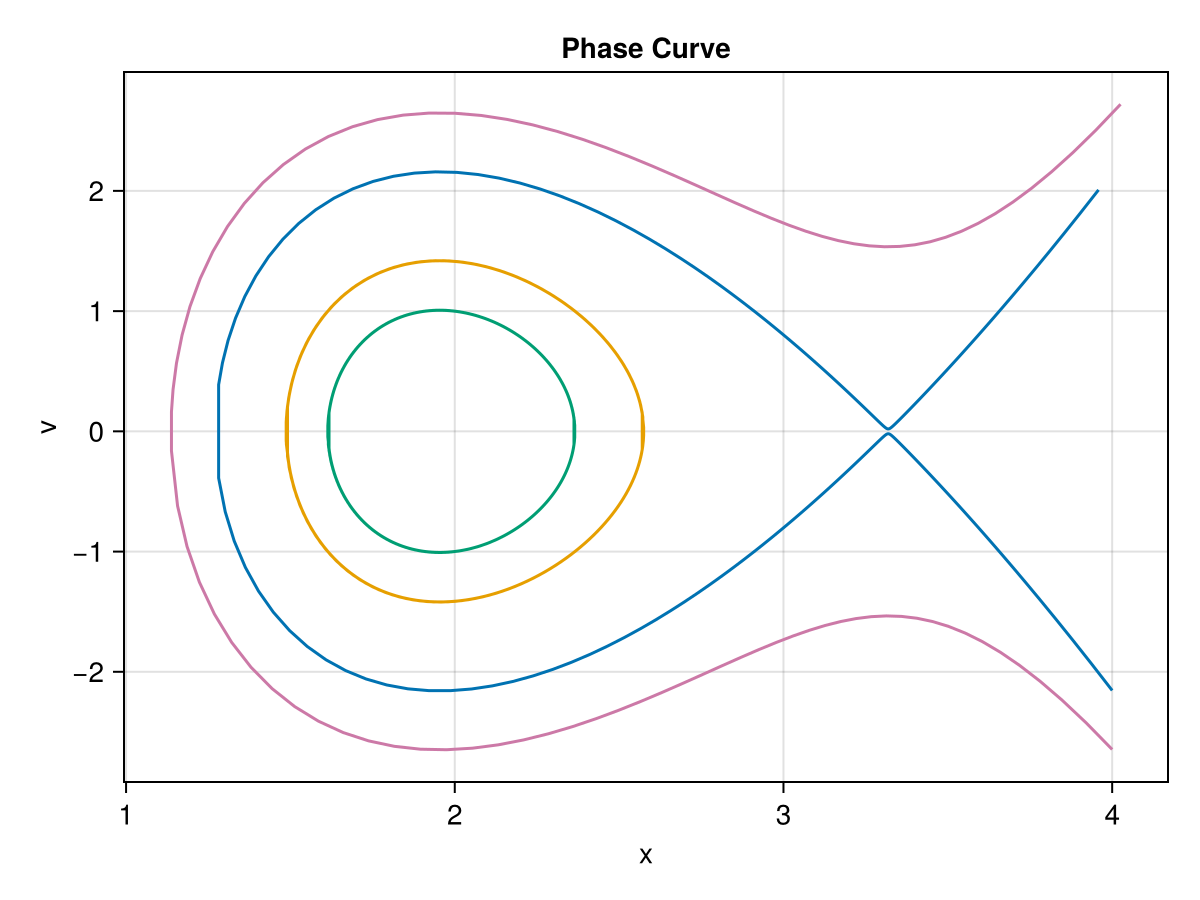

In [304]:
N=101
fig = Figure()
ax = fig[1, 1] = Axis(fig, title="Phase Curve", xlabel="x", ylabel="v")
X, V, = phase_curve(3.322, U, 4, -1.0, 10.0, 308)
lines!(ax, X, V)
X, V = phase_curve(2.0, U, 2.0, -1.0, 10.0, 300)
lines!(ax, X, V)
X, V = phase_curve(1.5, U, 2.0, -1.0, 10.0, 300)
lines!(ax, X, V)
X, V = phase_curve(4.5,  U, 4.0, -1.0, 10.0, 100)
lines!(ax, X, V)
fig

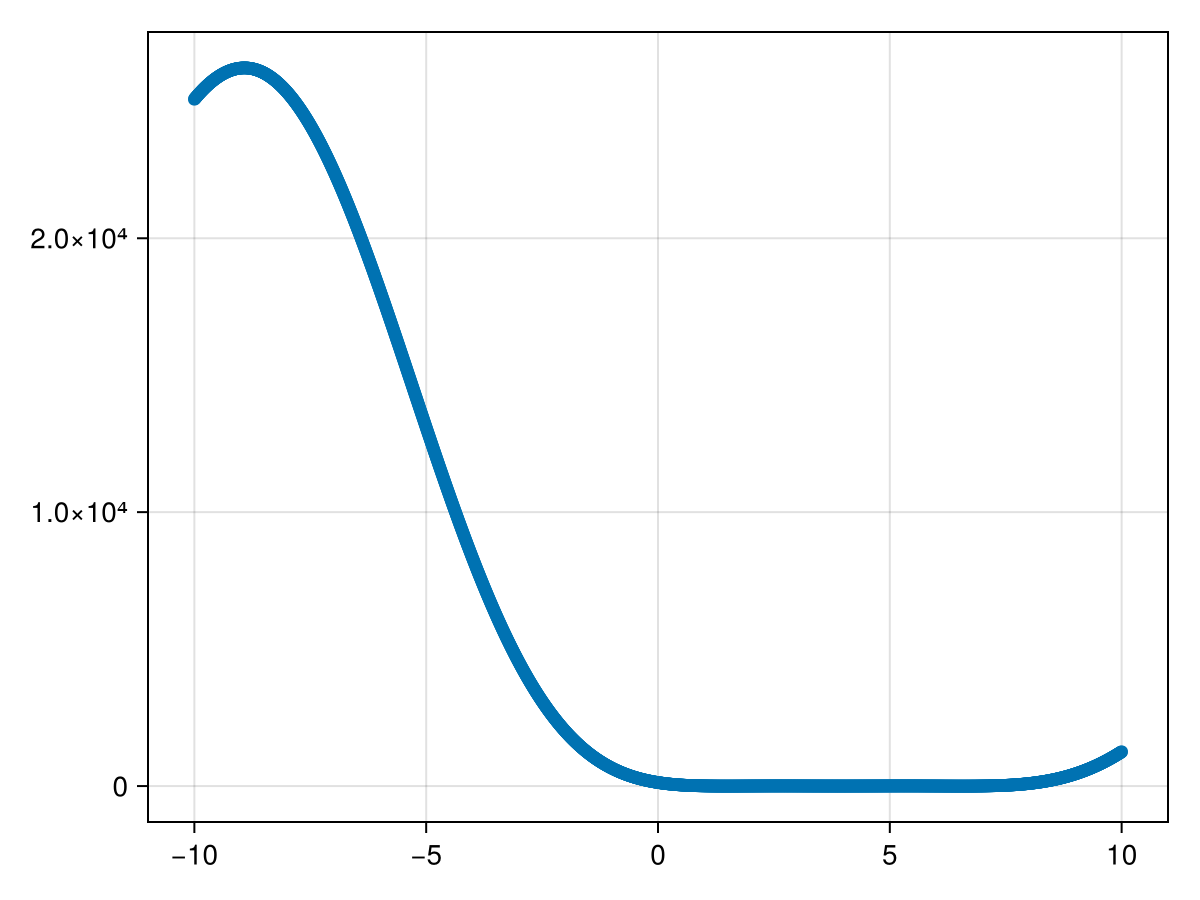

In [323]:
U1= lagrange_polynomial([1.0, 2, 3, 4, 5, 6, 7], [6, 2.0, 3.3, 1.0, 4.0, 2.0, 4.0 ])
U2(x) = U1(x)*(exp(-0.02*(x-3)^2))
x = -10:0.01:10
plot(x, U2.(x))

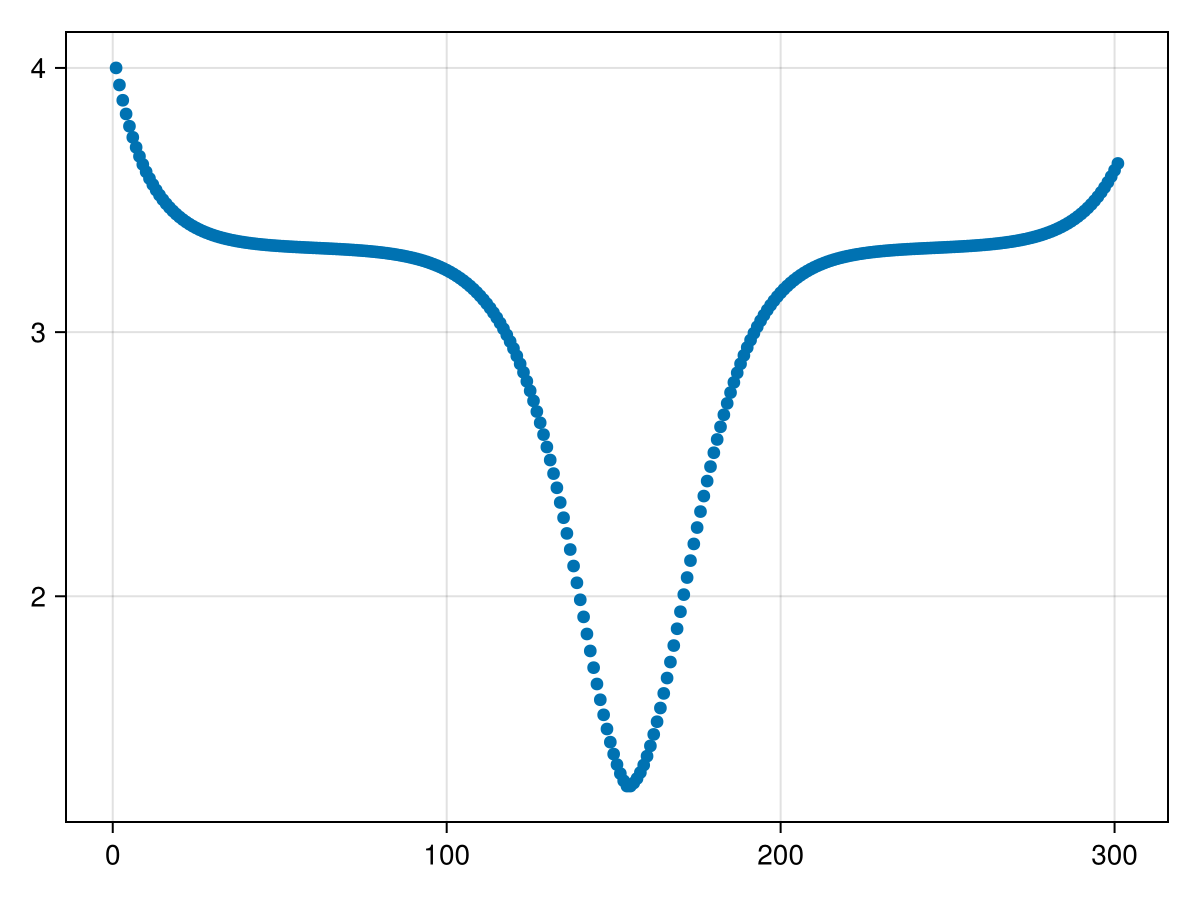

In [286]:
plot(X2)

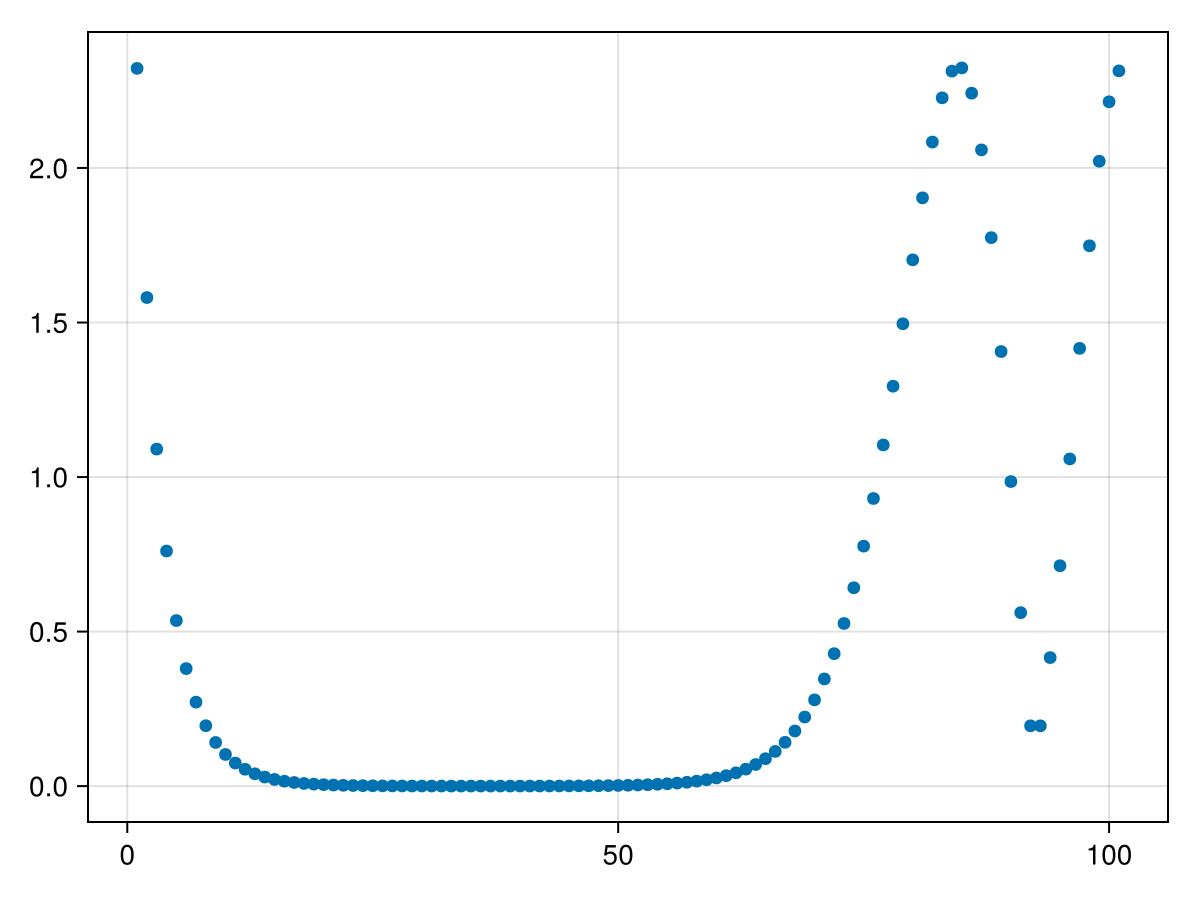

In [193]:
plot(DE)

In [187]:
maximum(U.(x)[100:end])

3.3217920000000163